# Our understanding of the question . . .
        As per the questions asked we think that we just need to find the disparity(x Direction) in the images and not the depth maps as stated on the data website.
# So
        We took one example of the training image and generated codes for finding the disparities with the help of different loss functions

## Importing Libraries

In [155]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Reading Image

In [7]:
img0 = cv2.imread('im0.png')
img1 = cv2.imread('im1.png')

## Converting RGB Image to GrayScale Image

In [39]:
#Converting RGB Image to GrayScale
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

## Visualisation of Images

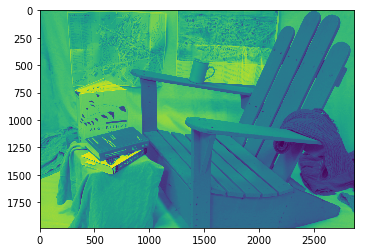

In [157]:
plt.imshow(img0)

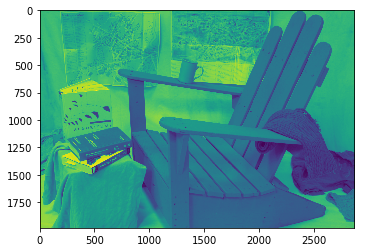

In [158]:
plt.imshow(img1)

In [159]:
print(' Image0 Shape =>',img0.shape,'\n','Image1 Shape =>' , img1.shape)

 Image0 Shape => (1984, 2872) 
 Image1 Shape => (1984, 2872)


## We will take a block of w size from Image 1 and iterate over Image 0 to find loss with all the blocks in that ScanLine

## ! Taking Input of the block's size

In [160]:
#Block Size
w = int(input('Enter window width\n'))
block = img1[:w][:w]

Enter w
5


# Original Disparity of the taken image => 290

## 1. Sum of Squared Difference
    It is the sum of the squared differences between each observation 
### Disparity : 293

In [161]:
l = []
for i in range(img0.shape[1] - w):
    
    temp = img0[0:w,i:i+w]
    #print(temp)
    loss = 0
    for r in range(w):
        for c in range(w):
            loss = loss + pow((temp[r,c] - block[r,c]) , 2)
    l.append(loss)
print(l.index(min(l)))
#Index of the smallest loss gives the Disparity
#min(l) gives the lowest loss and l.index() tells its index

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


293


## 2. Sum of Absolute Difference
    It is the sum of the absolute differences between each observation 
### Disparity : 293

In [162]:
l = []
for i in range(img0.shape[1] - w):
    
    temp = img0[0:w,i:i+w]
    #print(temp)
    loss = 0
    for r in range(w):
        for c in range(w):
            loss = loss + abs(temp[r,c] - block[r,c])
    l.append(loss)
print(l.index(min(l)))

293


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


## 3. Zero Mean Normalised Cross Correlation
    Zero Mean Normalized Cross-Correlation or shorter ZNCC is an integer you can get when you compare two grayscale images.
### Disparity : 276
    Here we'll check the max in the list because
    The higher the ZNCC gets, the more are those two images correlated. 

In [163]:
# Some Functions that we'll be using for ZNCC calculation
def getAverage(img, u, v, n):
    """img as a square matrix of numbers"""
    s = 0
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += img[u+i][v+j]
    return float(s)/(2*n+1)**2

def getStandardDeviation(img, u, v, n):
    s = 0
    avg = getAverage(img, u, v, n)
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += (img[u+i][v+j] - avg)**2
    return (s**0.5)/(2*n+1)
def zncc(img1, img2, u1, v1, u2, v2, n):
    stdDeviation1 = getStandardDeviation(img1, u1, v1, n)
    stdDeviation2 = getStandardDeviation(img2, u2, v2, n)
    avg1 = getAverage(img1, u1, v1, n)
    avg2 = getAverage(img2, u2, v2, n)

    s = 0
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += (img1[u1+i][v1+j] - avg1)*(img2[u2+i][v2+j] - avg2)
    return float(s)/((2*n+1)**2 * stdDeviation1 * stdDeviation2)


In [164]:
l = []
t = 0
for i in range(img0.shape[1] - w):
    
    temp = img0[0:w,i:i+w]
    t = zncc(temp , block , 1,1,1,1,1)
    #print(temp)
    l.append(t)
print(l.index(max(l)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


276


# 4. Rank Transform
    Rank transformation is an active and connected transformation that performs the filtering of data based on group and ranks. For example, you want to get ten records of employees having highest salary, such kind of filtering can be done by rank transformation.

# 5. Census Transform

    The Census transform is a technique of relevance to the correspondence problem in Machine Vision. As a non-parametric technique, it relies on the ordering of information rather than its actual values.

    The algorithm is based on taking a local neighbourhood around each pixel in an image, writing into a bit string either a one(if the intensity of the neighbour pixel is less than that of the reference pixel) or a zero (if the intensity of the neighbor pixel is greater than  the reference pixel) , and finally computing the hamming distance...

    As it is not based on the actual gray values, the technique is essentially resilient to gain.

    Its key advantages are;

    It is easily and efficiently implemented on hardware.
    Works well in the presence of discontinuities
    Does not require constant illumination.


# -------------------------------------------------------------
# 2 Which block size gives the most accurate disparity

## For w = 5

In [177]:
w = 5
block = img1[:w][:w]

In [178]:
w = 5
l = []
for i in range(img0.shape[1] - w):
    
    temp = img0[0:w,i:i+w]
    #print(temp)
    loss = 0
    for r in range(w):
        for c in range(w):
            loss = loss + pow((temp[r,c] - block[r,c]) , 2)
    loss = loss/(w*w)
    loss = np.sqrt(loss)
    l.append(loss)
print(l.index(min(l)))
#Index of the smallest loss gives the Disparity
#min(l) gives the lowest loss and l.index() tells its index

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


293


## For w=7

In [179]:
w = 7
block = img1[:w][:w]

In [180]:

l = []
for i in range(img0.shape[1] - w):
    
    temp = img0[0:w,i:i+w]
    #print(temp)
    loss = 0
    for r in range(w):
        for c in range(w):
            loss = loss + pow((temp[r,c] - block[r,c]) , 2)
    loss = loss/(w*w)
    loss = np.sqrt(loss)
    l.append(loss)
print(l.index(min(l)))
#Index of the smallest loss gives the Disparity
#min(l) gives the lowest loss and l.index() tells its index

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


2256


# w=5 is better for disparity